<a href="https://colab.research.google.com/github/Yanmi01/Neural-Network-from-scratch/blob/main/backprop_for_Neural_Network_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(5.0)

60.0

In [4]:
x_d = np.arange(-6, 6, 0.25)
x_d

array([-6.  , -5.75, -5.5 , -5.25, -5.  , -4.75, -4.5 , -4.25, -4.  ,
       -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75,
       -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
        0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,
        3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
        5.25,  5.5 ,  5.75])

In [5]:
y_d = f(x_d)
y_d

array([137.    , 127.1875, 117.75  , 108.6875, 100.    ,  91.6875,
        83.75  ,  76.1875,  69.    ,  62.1875,  55.75  ,  49.6875,
        44.    ,  38.6875,  33.75  ,  29.1875,  25.    ,  21.1875,
        17.75  ,  14.6875,  12.    ,   9.6875,   7.75  ,   6.1875,
         5.    ,   4.1875,   3.75  ,   3.6875,   4.    ,   4.6875,
         5.75  ,   7.1875,   9.    ,  11.1875,  13.75  ,  16.6875,
        20.    ,  23.6875,  27.75  ,  32.1875,  37.    ,  42.1875,
        47.75  ,  53.6875,  60.    ,  66.6875,  73.75  ,  81.1875])

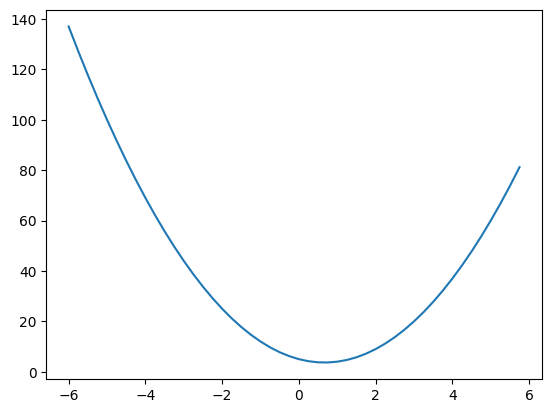

In [6]:
plt.plot(x_d, y_d)
#

The derivative is defined as how much the slope chnaged after the value (x) was changed (increased or decreased) by a very small value (h)

In [7]:
h= 0.001  #h is a very small value
x = 5
(f(x+h) - f(x))/h

26.003000000002885

the difference is then normalized by the run: rise/run. the difference "f(x+h) - f(x))" is the dy while h is the dx

---



In [8]:
a = 4.0
b = -6.0
c = 20.0
d = a * b + c
print(d)

-4.0


to get the derivative of d with respect to a, b , & c

In [9]:
h = 0.0001

a = 4.0
b = -6.0
c = 20.0

d1 = a * b + c
a +=h
d2 = a * b + c
da = (d2 - d1)/h
print("d1", d1)
print("d2", d2)
print("slope:", (d2 - d1)/h)

d1 -4.0
d2 -4.000599999999999
slope: -5.9999999999860165




---



In [12]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self.grad = 0.0
    self._backward = lambda: None
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e  = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
G = d*f; G.label = 'G'
G

Value(data=-8.0)

In [13]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

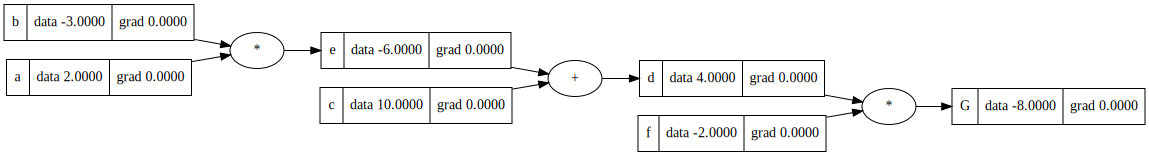

In [14]:
draw_dot(G)

In [15]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e  = a * b
d = e + c
G = d * f

print(G.data)

-8.0


In [16]:
def lolly():

  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e  = a*b; e.label = 'e'
  d = e+c; d.label = 'd'
  f = Value(-2.0, label='f')
  G = d*f; G.label = 'G'
  G1 = G.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e  = a*b; e.label = 'e'
  d = e+c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label='f')
  G = d*f; G.label = 'G'
  G2 = G.data

  print("G1", G1)
  print("G2", G2)
  print("slope:", (G2 - G1)/h)

lolly()

G1 -8.0
G2 -8.0002
slope: -1.9999999999953388


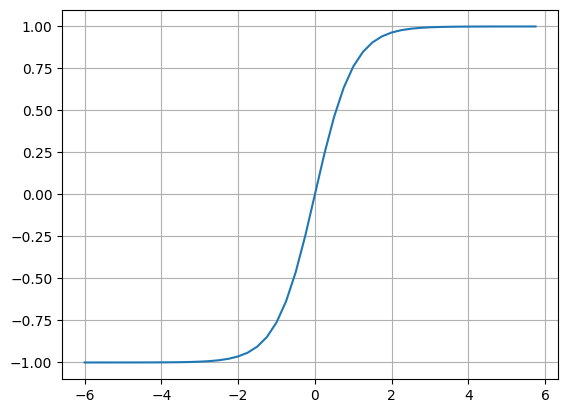

In [17]:
plt.plot(np.arange(-6,6,0.25), np.tanh(np.arange(-6,6,0.25))); plt.grid(True)

In [19]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0,  label='w2')

#bias
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'

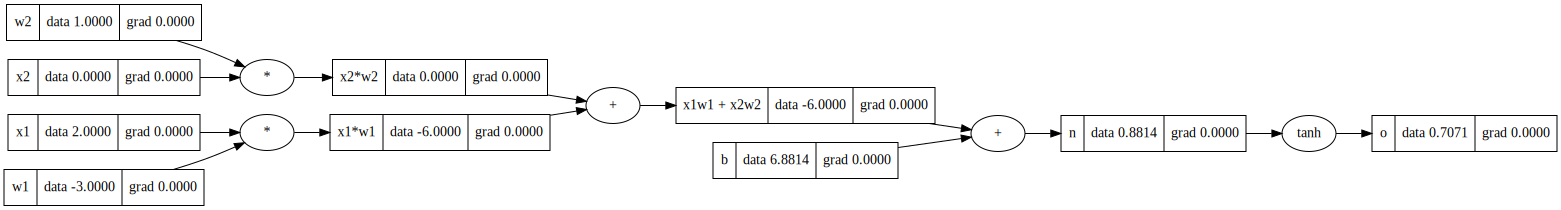

In [20]:
draw_dot(o)

In [21]:
o.backward()

In [22]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o) # o rather tyhan self to indicate starting point
topo

[Value(data=6.881373587019543),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [23]:
o.grad = 1.0

In [24]:
o._backward()

In [25]:
n._backward()

In [26]:
b._backward()

In [27]:
x1w1x2w2._backward()

In [28]:
x1w1._backward()
x2w2._backward()

In [29]:
x1.grad = x1w1.grad
x2.grad = x2w2.grad
w1.grad = x1w1.grad
w2.grad = x2w2.grad


In [30]:
x1w1.grad =0.5
x2w2.grad =0.5

In [31]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [33]:
n.grad = 0.5
o.grad = 0.5

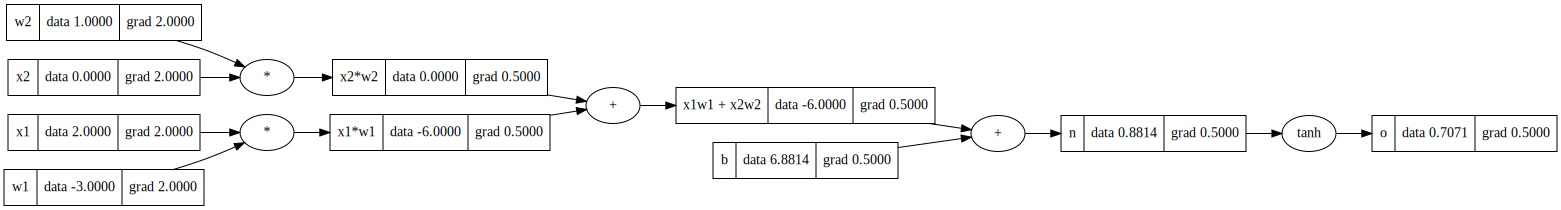

In [34]:
draw_dot(o)

With this, we've been able to successfully implement gradient descent from scratch and see how it moves across a neural network